# Diseño Experimental

Muestra de datos simulados (primeras filas):
 escenario   metodo     valor  runtime
         0 MILP_PWL 30.098760 6.850300
         0   Greedy 29.266207 2.130943
         0      LNS 30.432639 2.286172
         1 MILP_PWL 18.006321 7.609165
         1   Greedy 18.437028 2.410807

Resumen — Calidad (valor, menor mejor):
  metodo      mean       sd    median       IQR    %_best
MILP_PWL 21.370033 5.624676 21.095730 10.929750 56.666667
  Greedy 22.214892 6.267210 20.997689 11.196577 20.000000
     LNS 21.843710 5.865360 21.881484 10.142202 23.333333

Resumen — Tiempo (runtime, menor mejor):
  metodo     mean       sd   median      IQR  %_best
MILP_PWL 9.877864 5.254613 8.643031 4.921824     0.0
  Greedy 1.719275 0.393361 1.691538 0.570889    90.0
     LNS 3.474129 1.451276 3.150447 1.568110    10.0


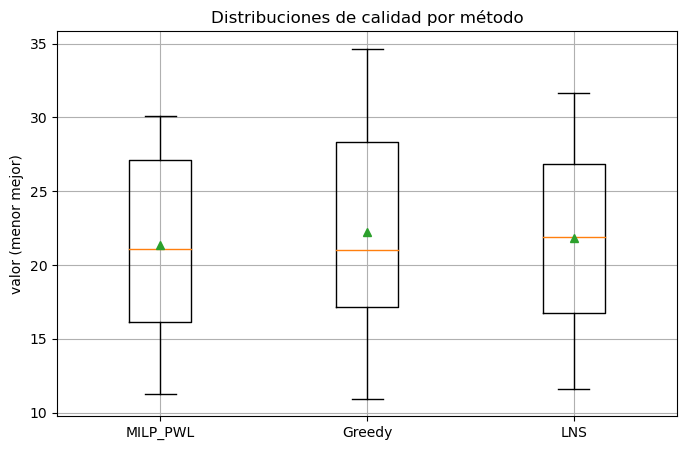

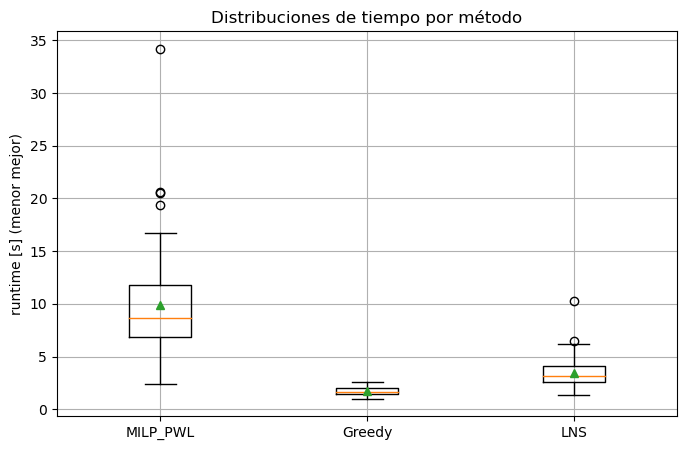

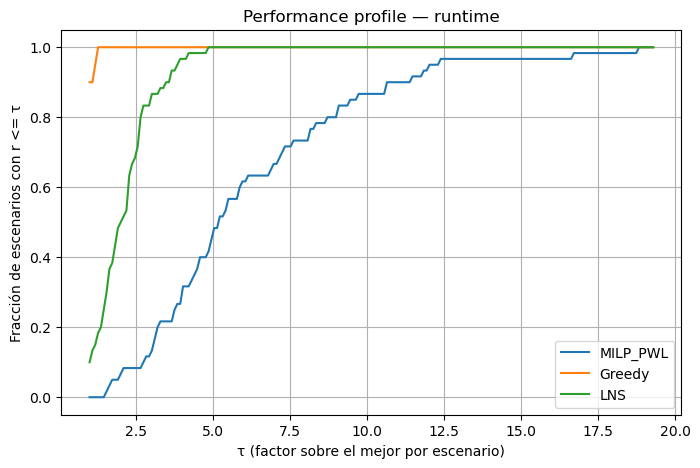

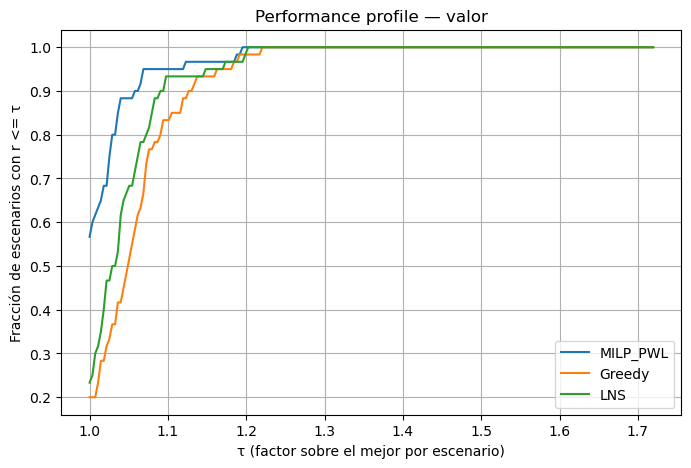


--- Comparación pareada: MILP_PWL vs Greedy — métrica: valor ---
Media(diff=MILP_PWL-Greedy) = -0.8449, Mediana = -0.7688
Shapiro-Wilk p=0.003375
Anderson-Darling A2=1.236 (crit: [0.544 0.619 0.743 0.866 1.03 ])
Jarque–Bera: JB=16.166, p=0.0003088
t-test pareado: t=-3.946, p=0.0002139
Wilcoxon signed-rank: W=359.000, p=4.325e-05
Cohen dz=-0.509; Rank-biserial r=0.608
IC95% media diff: [-1.2733, -0.4165] (media=-0.8449)
IC95% mediana diff (bootstrap): [-1.1605, -0.4031] (mediana=-0.7688)


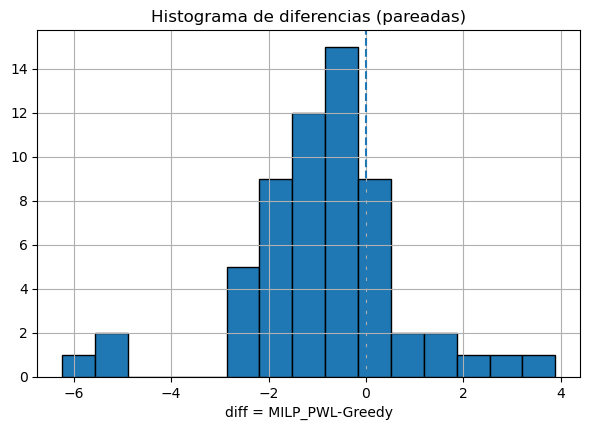

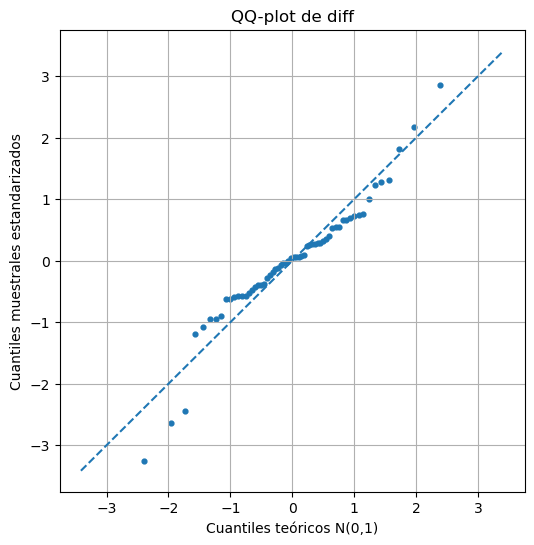

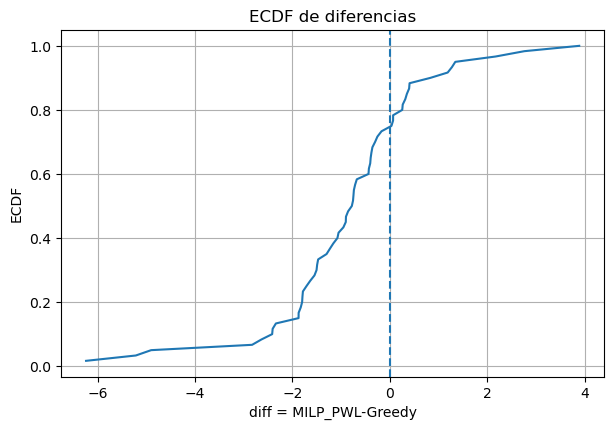


--- Comparación pareada: MILP_PWL vs LNS — métrica: valor ---
Media(diff=MILP_PWL-LNS) = -0.4737, Mediana = -0.3704
Shapiro-Wilk p=0.1687
Anderson-Darling A2=0.626 (crit: [0.544 0.619 0.743 0.866 1.03 ])
Jarque–Bera: JB=2.890, p=0.2357
t-test pareado: t=-4.432, p=4.117e-05
Wilcoxon signed-rank: W=408.000, p=0.0001925
Cohen dz=-0.572; Rank-biserial r=0.554
IC95% media diff: [-0.6875, -0.2598] (media=-0.4737)
IC95% mediana diff (bootstrap): [-0.5423, -0.1824] (mediana=-0.3704)


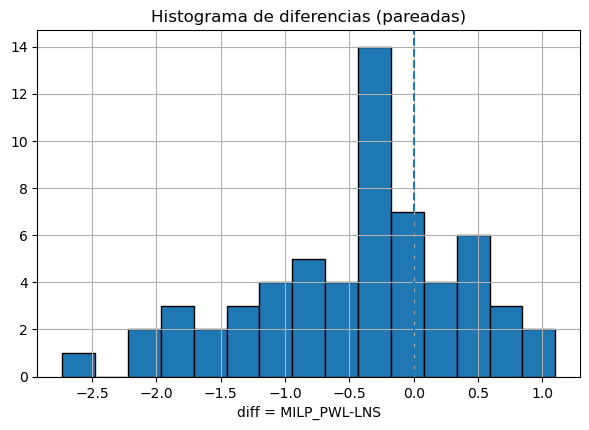

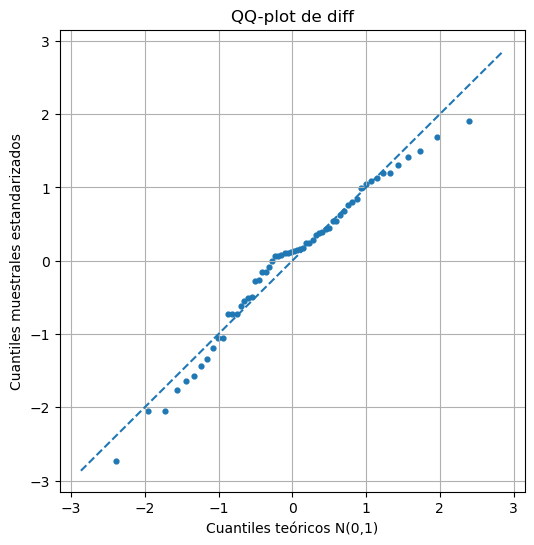

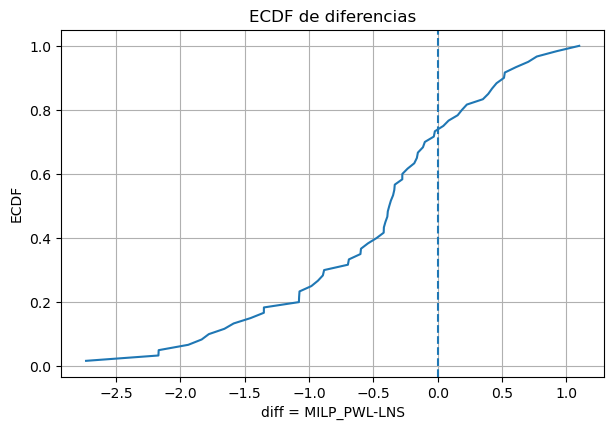


--- Comparación pareada: MILP_PWL vs Greedy — métrica: runtime ---
Media(diff=MILP_PWL-Greedy) = 8.1586, Mediana = 6.9027
Shapiro-Wilk p=4.504e-06
Anderson-Darling A2=1.816 (crit: [0.544 0.619 0.743 0.866 1.03 ])
Jarque–Bera: JB=117.447, p=0
t-test pareado: t=11.895, p=2.608e-17
Wilcoxon signed-rank: W=0.000, p=1.671e-11
Cohen dz=1.536; Rank-biserial r=1.000
IC95% media diff: [6.7861, 9.5311] (media=8.1586)
IC95% mediana diff (bootstrap): [5.8989, 8.5530] (mediana=6.9027)


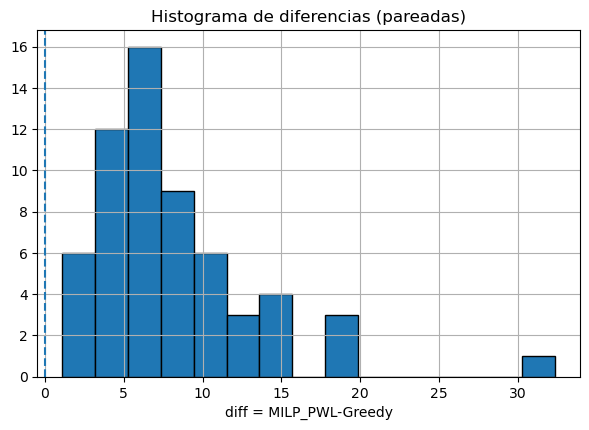

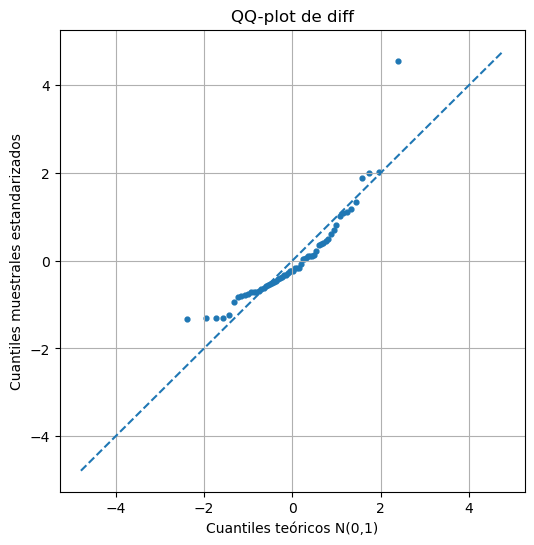

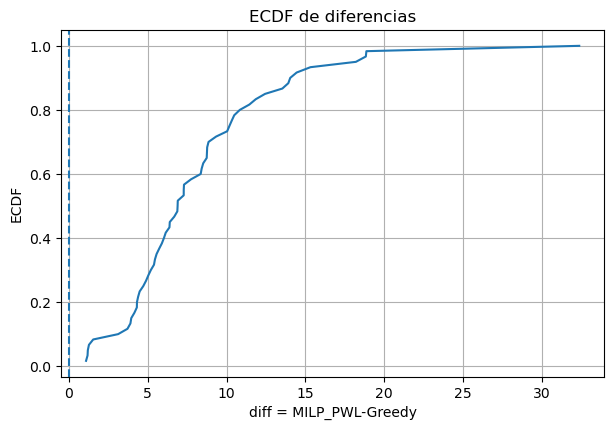


Comparaciones múltiples (pareadas) en valor con Holm:
  MILP_PWL vs Greedy    p=4.325e-05  Holm-thr=0.01667  => Rechaza H0
  MILP_PWL vs LNS       p=0.0001925  Holm-thr=0.025  => Rechaza H0
  Greedy vs LNS         p=0.04255  Holm-thr=0.05  => Rechaza H0

Comparaciones múltiples (pareadas) en runtime con Holm:
  MILP_PWL vs Greedy    p=1.671e-11  Holm-thr=0.01667  => Rechaza H0
  MILP_PWL vs LNS       p=4.121e-11  Holm-thr=0.025  => Rechaza H0
  Greedy vs LNS         p=9.058e-11  Holm-thr=0.05  => Rechaza H0

Tamaño muestral aproximado necesario (pareado) para d=0.5, α=0.05, potencia=0.8: n≈32 escenarios


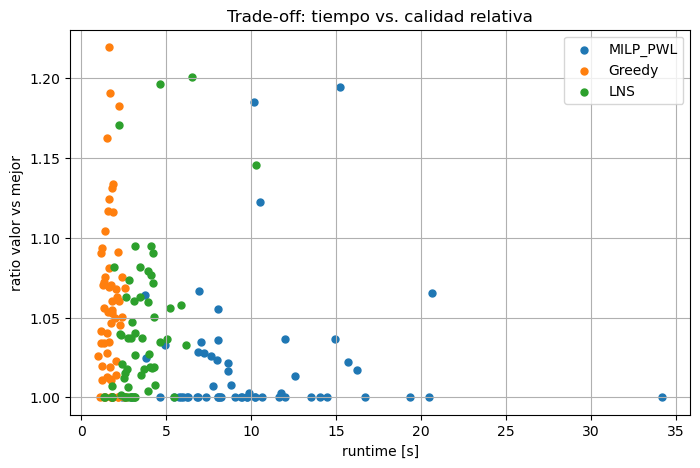


FIN DEL DEMO — Notas de lectura:
• Use los boxplots para comparar distribuciones (medianas/IQR) de calidad y tiempo.
• Los perfiles de desempeño muestran, para cada τ, el % de escenarios en que un método está a ≤τ del mejor.
• Para comparación pareada, mire normalidad (Shapiro/Anderson o Jarque–Bera).
  Si no es normal, confíe más en Wilcoxon y el tamaño de efecto (r biserial).
• Reporte siempre IC (media y mediana) y aplique Holm al comparar múltiples métodos.


In [1]:
# Diseño experimental completo (texto + código) para comparar algoritmos en escenarios emparejados
# ---------------------------------------------------------------------------------------------
# Qué incluye este script:
# 1) Genera datos sintéticos de 3 métodos (MILP_PWL, Greedy, LNS) en P escenarios emparejados.
#    - Métrica 1 (calidad): "valor" a MINIMIZAR (p.ej., supervivencia total). Hay casos normales y no normales.
#    - Métrica 2 (tiempo): "runtime" a MINIMIZAR (segundos), con colas pesadas (log-normal).
# 2) Visualizaciones: boxplots, ECDF, QQ-plot, histogramas, perfiles de desempeño (Dolan–Moré).
# 3) Tests estadísticos (con fallback si SciPy no está disponible):
#    - Normalidad: Shapiro–Wilk y/o Anderson–Darling (si hay SciPy); si no, Jarque–Bera (implementado).
#    - Comparaciones pareadas (mismo escenario): t-test pareado (si normal) y Wilcoxon (fallback/robusto).
#    - Tamaños de efecto: Cohen's d_z (pareado) y correlación biserial de rangos (Wilcoxon).
#    - Múltiples comparaciones 3 métodos: pares con Holm–Bonferroni.
# 4) Cálculo de potencia aproximado: tamaño muestral n para detectar un efecto pareado d con α y power deseados.
#
# Reglas del entorno: matplotlib puro, una figura por gráfico, no fijar colores. Sin seaborn.
# ---------------------------------------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========== Utilidades estadísticas (sin SciPy) ==========

def try_import_scipy():
    try:
        import scipy.stats as st
        return st
    except Exception:
        return None

st = try_import_scipy()

def skew_kurtosis(x):
    x = np.asarray(x, dtype=float)
    n = x.size
    m = np.mean(x)
    s2 = np.mean((x-m)**2)
    s = np.sqrt(s2) if s2>0 else 0.0
    if s == 0 or n < 3:
        return 0.0, 0.0
    g1 = np.mean(((x-m)/s)**3)  # skewness muestral (no Fisher)
    g2 = np.mean(((x-m)/s)**4)  # kurtosis muestral (no Fisher)
    excess = g2 - 3.0           # exceso de curtosis
    return g1, excess

def jarque_bera(x):
    # JB ~ chi2_2 bajo H0 normalidad
    x = np.asarray(x, dtype=float)
    n = x.size
    g1, ex = skew_kurtosis(x)
    JB = n/6.0 * (g1**2 + 0.25*ex**2)
    # p-valor con chi-cuadrado 2 df (aprox) – si SciPy no está, usamos aprox gamma CDF cerrada
    if st is not None:
        p = 1 - st.chi2.cdf(JB, df=2)
    else:
        # CDF chi2(k=2)(x) = 1 - e^{-x/2}
        p = np.exp(-JB/2.0)
    return JB, p

def qqplot_data(x):
    # QQ plot contra Normal(0,1) sin SciPy: usa cuantiles teóricos de N(0,1)
    x = np.asarray(x, dtype=float)
    x = x[np.isfinite(x)]
    x = np.sort(x)
    n = x.size
    if n < 3:
        return np.array([]), np.array([])
    probs = (np.arange(1, n+1) - 0.5)/n
    # pp -> quantiles teóricos de normal(0,1)
    # inversa de la normal estándar: usa aproximación racional (Acklam) si no hay SciPy
    if st is not None:
        q_theo = st.norm.ppf(probs)
    else:
        # Aproximación de Peter John Acklam (Rational approximation to inverse normal CDF)
        # https://web.archive.org/web/20150910044715/http://home.online.no/~pjacklam/notes/invnorm/
        a = [ -3.969683028665376e+01,  2.209460984245205e+02, -2.759285104469687e+02,
               1.383577518672690e+02, -3.066479806614716e+01,  2.506628277459239e+00 ]
        b = [ -5.447609879822406e+01,  1.615858368580409e+02, -1.556989798598866e+02,
               6.680131188771972e+01, -1.328068155288572e+01 ]
        c = [ -7.784894002430293e-03, -3.223964580411365e-01, -2.400758277161838e+00,
              -2.549732539343734e+00,  4.374664141464968e+00,  2.938163982698783e+00 ]
        d = [ 7.784695709041462e-03,  3.224671290700398e-01,  2.445134137142996e+00,
              3.754408661907416e+00 ]
        plow = 0.02425
        phigh = 1 - plow
        q_theo = np.zeros_like(probs)
        for i, p in enumerate(probs):
            if p < plow:
                q = p
                q = np.sqrt(-2*np.log(q))
                q_theo[i] = (((((c[0]*q + c[1])*q + c[2])*q + c[3])*q + c[4])*q + c[5]) / \
                             ((((d[0]*q + d[1])*q + d[2])*q + d[3])*q + 1)
            elif phigh < p:
                q = 1-p
                q = np.sqrt(-2*np.log(q))
                q_theo[i] = -(((((c[0]*q + c[1])*q + c[2])*q + c[3])*q + c[4])*q + c[5]) / \
                              ((((d[0]*q + d[1])*q + d[2])*q + d[3])*q + 1)
            else:
                q = p - 0.5
                r = q*q
                q_theo[i] = (((((a[0]*r + a[1])*r + a[2])*r + a[3])*r + a[4])*r + a[5])*q / \
                             (((((b[0]*r + b[1])*r + b[2])*r + b[3])*r + b[4])*r + 1)
    # Estandariza x a N(0,1) para comparación lineal
    x_std = (x - np.mean(x)) / (np.std(x, ddof=1) if np.std(x, ddof=1)>0 else 1)
    return q_theo, x_std

def ttest_paired(diff, use_scipy=True):
    # diff = y - x (pareada). Devuelve t, p-valor (bilateral)
    diff = np.asarray(diff, dtype=float)
    diff = diff[np.isfinite(diff)]
    n = diff.size
    md = np.mean(diff)
    sd = np.std(diff, ddof=1) if n>1 else np.nan
    if n < 2 or sd == 0 or not np.isfinite(sd):
        return np.nan, np.nan
    t = md / (sd/np.sqrt(n))
    if st is not None and use_scipy:
        p = st.t.sf(np.abs(t), df=n-1)*2
    else:
        # aprox normal para n≥30
        if n >= 30:
            from math import erf, sqrt
            z = np.abs(t)
            p = 2*(1 - 0.5*(1+erf(z/np.sqrt(2))))
        else:
            p = np.nan
    return t, p

def wilcoxon_signed_rank(diff, zero_method='wilcox', correction=True):
    # Implementación ligera (aprox normal) si SciPy no está; si está, usa SciPy
    if st is not None:
        stat, p = st.wilcoxon(diff, zero_method=zero_method, correction=correction, alternative='two-sided', mode='auto')
        return stat, p
    # Fallback aproximado:
    d = np.asarray(diff, dtype=float)
    d = d[np.isfinite(d)]
    d = d[d != 0]  # retirar ceros
    n = d.size
    if n == 0:
        return np.nan, np.nan
    ranks = np.argsort(np.argsort(np.abs(d))) + 1  # rangos 1..n (empates ignorados para simplificar)
    Wpos = np.sum(ranks[d > 0])
    # Normal approx
    mu = n*(n+1)/4.0
    sigma = np.sqrt(n*(n+1)*(2*n+1)/24.0)
    z = (Wpos - mu - 0.5*np.sign(Wpos-mu) if correction else Wpos - mu)/sigma if sigma>0 else 0.0
    # p bilateral
    from math import erf, sqrt
    p = 2*(1 - 0.5*(1+erf(np.abs(z)/np.sqrt(2))))
    return Wpos, p

def cohen_dz(diff):
    diff = np.asarray(diff, dtype=float)
    diff = diff[np.isfinite(diff)]
    n = diff.size
    sd = np.std(diff, ddof=1) if n>1 else np.nan
    if sd == 0 or not np.isfinite(sd):
        return np.nan
    return np.mean(diff)/sd

def rank_biserial_from_wilcoxon(diff, stat=None):
    # r_rb = 1 - 2*T / (n(n+1)/2), donde T = suma de rangos del signo "menor" (SciPy retorna suma de rangos de positivos)
    d = np.asarray(diff, dtype=float)
    d = d[np.isfinite(d)]
    d = d[d != 0]
    n = d.size
    if n == 0:
        return np.nan
    if st is not None and stat is None:
        stat, _ = st.wilcoxon(d)
    elif stat is None:
        # pequeña réplica de arriba
        ranks = np.argsort(np.argsort(np.abs(d))) + 1
        stat = np.sum(ranks[d > 0])
    T = float(stat)
    denom = n*(n+1)/2.0
    r_rb = 1.0 - 2.0*T/denom
    return r_rb

def holm_correction(pvals_dict, alpha=0.05):
    # pvals_dict: {"A vs B": p, "A vs C": p, ...}
    items = sorted(pvals_dict.items(), key=lambda kv: kv[1])
    m = len(items)
    decisions = {}
    for i, (name, p) in enumerate(items, start=1):
        thr = alpha/(m - i + 1)
        decisions[name] = (p, p <= thr, thr)
        if p > thr:
            # una vez que uno no rechaza, en Holm se puede seguir,
            # pero reportamos umbrales individuales igualmente.
            pass
    return decisions

def ci_mean_paired(diff, alpha=0.05):
    # IC para la media de la diferencia (pareado), t-Student
    diff = np.asarray(diff, dtype=float)
    diff = diff[np.isfinite(diff)]
    n = diff.size
    md = np.mean(diff)
    sd = np.std(diff, ddof=1) if n>1 else np.nan
    if n < 2 or not np.isfinite(sd):
        return (np.nan, np.nan, md)
    if st is not None:
        tcrit = st.t.ppf(1 - alpha/2, df=n-1)
    else:
        # aprox normal
        from math import sqrt
        tcrit = 1.96
    half = tcrit*sd/np.sqrt(n)
    return (md - half, md + half, md)

def bootstrap_ci_median(diff, B=5000, alpha=0.05, seed=123):
    rng = np.random.default_rng(seed)
    d = np.asarray(diff, dtype=float)
    d = d[np.isfinite(d)]
    n = d.size
    if n == 0:
        return (np.nan, np.nan, np.nan)
    meds = np.empty(B, dtype=float)
    for b in range(B):
        sample = rng.choice(d, size=n, replace=True)
        meds[b] = np.median(sample)
    lo = np.quantile(meds, alpha/2)
    hi = np.quantile(meds, 1 - alpha/2)
    return (lo, hi, np.median(d))

def approx_sample_size_paired(effect_d=0.5, alpha=0.05, power=0.8):
    # Aproximación normal: n ≈ ((z_{1-α/2}+z_{power})/d)^2
    if st is not None:
        z_alpha = st.norm.ppf(1 - alpha/2.0)
        z_power = st.norm.ppf(power)
    else:
        # z 95% ~ 1.96, z power~0.842 (80%)
        z_alpha = 1.96
        z_power = 0.842
    n = ((z_alpha + z_power)/effect_d)**2
    return int(np.ceil(n))

# ========== Simulación de datos emparejados (escenarios) ==========

def simulate_data(P=60, seed=42):
    rng = np.random.default_rng(seed)
    methods = ["MILP_PWL", "Greedy", "LNS"]
    rows = []
    # dificultad base por escenario
    base = rng.uniform(10, 30, size=P)  # escala de "valor" base (a minimizar)
    for p in range(P):
        # Calidad (menor mejor): generamos como base * (1 + ruido)
        # MILP: casi óptimo, ruido pequeño, a veces exacto
        val_milp = base[p] * (1 + rng.normal(0, 0.02))
        # Greedy: sesgo + colas (algunas malas decisiones → heavy tail)
        val_greedy = base[p] * (1 + rng.laplace(0.03, 0.04))
        # LNS: intermedio, con t-student (cola más pesada que normal)
        val_lns = base[p] * (1 + rng.standard_t(df=5)*0.03 + 0.015)

        # Runtime (menor mejor)
        # MILP: lognormal con media mayor y cola pesada
        rt_milp = np.exp(rng.normal(2.2, 0.5))  # ~ lognormal
        # Greedy: muy rápido (casi constante + algo de ruido)
        rt_greedy = np.exp(rng.normal(0.5, 0.25))
        # LNS: entre medio, variable
        rt_lns = np.exp(rng.normal(1.2, 0.35))

        rows += [
            {"escenario": p, "metodo": "MILP_PWL", "valor": float(val_milp), "runtime": float(rt_milp)},
            {"escenario": p, "metodo": "Greedy",    "valor": float(val_greedy), "runtime": float(rt_greedy)},
            {"escenario": p, "metodo": "LNS",       "valor": float(val_lns), "runtime": float(rt_lns)},
        ]
    df = pd.DataFrame(rows)
    # asegurar positivos
    df["valor"] = df["valor"].clip(lower=1e-9)
    df["runtime"] = df["runtime"].clip(lower=1e-6)
    return df, methods

df, methods = simulate_data(P=60, seed=2025)
print("Muestra de datos simulados (primeras filas):")
print(df.head().to_string(index=False))

# ========== Resumen descriptivo: media, sd, mediana, IQR, % mejor en cada escenario ==========

def summarize(df, metric="valor", minimize=True):
    out = []
    for m in methods:
        d = df[df["metodo"]==m][metric].values
        mu = float(np.mean(d))
        sd = float(np.std(d, ddof=1))
        med = float(np.median(d))
        q25, q75 = np.quantile(d, [0.25, 0.75])
        iqr = float(q75 - q25)
        out.append({"metodo": m, "mean": mu, "sd": sd, "median": med, "IQR": iqr})
    sumdf = pd.DataFrame(out)
    # % mejor por escenario
    better = []
    for p, group in df.groupby("escenario"):
        idx = group[metric].idxmin() if minimize else group[metric].idxmax()
        best_m = df.loc[idx, "metodo"]
        better.append(best_m)
    counts = pd.Series(better).value_counts().reindex(methods).fillna(0).astype(int)
    sumdf["%_best"] = (counts.values / counts.values.sum())*100
    return sumdf

print("\nResumen — Calidad (valor, menor mejor):")
print(summarize(df, metric="valor", minimize=True).to_string(index=False))
print("\nResumen — Tiempo (runtime, menor mejor):")
print(summarize(df, metric="runtime", minimize=True).to_string(index=False))

# ========== Gráficos básicos: boxplots ==========

plt.figure(figsize=(8,5))
data = [df[df["metodo"]==m]["valor"].values for m in methods]
plt.boxplot(data, labels=methods, showmeans=True)
plt.ylabel("valor (menor mejor)")
plt.title("Distribuciones de calidad por método")
plt.grid(); plt.show()

plt.figure(figsize=(8,5))
data = [df[df["metodo"]==m]["runtime"].values for m in methods]
plt.boxplot(data, labels=methods, showmeans=True)
plt.ylabel("runtime [s] (menor mejor)")
plt.title("Distribuciones de tiempo por método")
plt.grid(); plt.show()

# ========== Perfiles de desempeño (Dolan–Moré) para runtime y calidad ==========

def performance_profile(df, metric="runtime", minimize=True, methods=None):
    # ratio r_{p,m} = x_{p,m} / min_m x_{p,m} (si minimize=True)
    ratios = {}
    for m in methods:
        ratios[m] = []
    for p, group in df.groupby("escenario"):
        vals = group.set_index("metodo")[metric]
        if minimize:
            best = vals.min()
        else:
            best = vals.max()
        for m in methods:
            r = vals[m]/best if minimize else best/vals[m]
            ratios[m].append(float(r))
    # construir curvas
    taus = np.linspace(1, max( [max(v) for v in ratios.values()] )+0.5, 200)
    plt.figure(figsize=(8,5))
    for m in methods:
        v = np.array(ratios[m])
        phi = [(v <= t).mean() for t in taus]
        plt.plot(taus, phi, label=m)
    plt.xlabel("τ (factor sobre el mejor por escenario)")
    plt.ylabel("Fracción de escenarios con r <= τ")
    plt.title(f"Performance profile — {metric}")
    plt.legend(); plt.grid(); plt.show()

performance_profile(df, metric="runtime", minimize=True, methods=methods)
performance_profile(df, metric="valor",   minimize=True, methods=methods)

# ========== Comparaciones pareadas (MILP vs Greedy) sobre cada escenario ==========

def paired_analysis(df, mA, mB, metric="valor", minimize=True, alpha=0.05):
    # diff = A - B (menor mejor). Si diff<0, A es mejor.
    dA = df[df["metodo"]==mA].sort_values("escenario")[metric].values
    dB = df[df["metodo"]==mB].sort_values("escenario")[metric].values
    diff = dA - dB
    print(f"\n--- Comparación pareada: {mA} vs {mB} — métrica: {metric} ---")
    print(f"Media(diff={mA}-{mB}) = {np.mean(diff):.4f}, Mediana = {np.median(diff):.4f}")
    # Normalidad
    if st is not None:
        sh = st.shapiro(diff) if diff.size<=5000 else (None, None)
        print(f"Shapiro-Wilk p={sh.pvalue:.4g}" if sh is not None else "Shapiro omitido (n>5000)")
        ad = st.anderson(diff, dist='norm')
        print(f"Anderson-Darling A2={ad.statistic:.3f} (crit: {ad.critical_values})")
    JB, pJB = jarque_bera(diff)
    print(f"Jarque–Bera: JB={JB:.3f}, p={pJB:.4g}")
    # Tests
    t, pt = ttest_paired(diff)
    print(f"t-test pareado: t={t:.3f}, p={pt:.4g}")
    W, pW = wilcoxon_signed_rank(diff)
    print(f"Wilcoxon signed-rank: W={W:.3f}, p={pW:.4g}")
    # Efectos
    dz = cohen_dz(diff)
    r_rb = rank_biserial_from_wilcoxon(diff, stat=W)
    ci_lo, ci_hi, md = ci_mean_paired(diff)
    med_lo, med_hi, med = bootstrap_ci_median(diff)
    print(f"Cohen dz={dz:.3f}; Rank-biserial r={r_rb:.3f}")
    print(f"IC95% media diff: [{ci_lo:.4f}, {ci_hi:.4f}] (media={md:.4f})")
    print(f"IC95% mediana diff (bootstrap): [{med_lo:.4f}, {med_hi:.4f}] (mediana={med:.4f})")

    # Gráficos (hist, QQ, ECDF)
    plt.figure(figsize=(7,4.5))
    plt.hist(diff, bins=15, edgecolor='k')
    plt.axvline(0, linestyle='--')
    plt.xlabel(f"diff = {mA}-{mB}")
    plt.title("Histograma de diferencias (pareadas)")
    plt.grid(); plt.show()

    # QQ-plot
    q_theo, x_std = qqplot_data(diff)
    if q_theo.size > 0:
        plt.figure(figsize=(6,6))
        plt.scatter(q_theo, x_std, s=12)
        # línea 45°
        lim = max(np.max(np.abs(q_theo)), np.max(np.abs(x_std))) * 1.05
        plt.plot([-lim, lim], [-lim, lim], linestyle='--')
        plt.xlabel("Cuantiles teóricos N(0,1)")
        plt.ylabel("Cuantiles muestrales estandarizados")
        plt.title("QQ-plot de diff")
        plt.grid(); plt.show()

    # ECDF
    x = np.sort(diff)
    y = np.arange(1, x.size+1)/x.size
    plt.figure(figsize=(7,4.5))
    plt.plot(x, y)
    plt.axvline(0, linestyle='--')
    plt.xlabel(f"diff = {mA}-{mB}")
    plt.ylabel("ECDF")
    plt.title("ECDF de diferencias")
    plt.grid(); plt.show()

    return diff

# Comparar calidad (valor): MILP_PWL vs Greedy y MILP_PWL vs LNS
diff_val_MG = paired_analysis(df, "MILP_PWL", "Greedy", metric="valor", minimize=True)
diff_val_ML = paired_analysis(df, "MILP_PWL", "LNS",    metric="valor", minimize=True)

# Comparar runtime: MILP_PWL vs Greedy (esperable >0 si MILP más lento)
diff_rt_MG = paired_analysis(df, "MILP_PWL", "Greedy", metric="runtime", minimize=True)

# ========== Comparaciones múltiples (3 métodos) con corrección de Holm sobre pares ==========

def pairwise_tests_with_holm(df, methods, metric="valor", test="wilcoxon"):
    pairs = []
    pvals = {}
    for i in range(len(methods)):
        for j in range(i+1, len(methods)):
            A, B = methods[i], methods[j]
            dA = df[df["metodo"]==A].sort_values("escenario")[metric].values
            dB = df[df["metodo"]==B].sort_values("escenario")[metric].values
            diff = dA - dB
            if test == "ttest":
                _, p = ttest_paired(diff)
            else:
                _, p = wilcoxon_signed_rank(diff)
            name = f"{A} vs {B}"
            pairs.append(name); pvals[name] = p
    decisions = holm_correction(pvals, alpha=0.05)
    print(f"\nComparaciones múltiples (pareadas) en {metric} con Holm:")
    for name, (p, reject, thr) in decisions.items():
        print(f"  {name:20s}  p={p:.4g}  Holm-thr={thr:.4g}  => {'Rechaza H0' if reject else 'No rechaza'}")
    return decisions

pairwise_tests_with_holm(df, methods, metric="valor", test="wilcoxon")
pairwise_tests_with_holm(df, methods, metric="runtime", test="wilcoxon")

# ========== Tamaño muestral sugerido (potencia aproximada) ==========
# Ejemplo: ¿cuántos escenarios necesito para detectar un efecto pareado d=0.5 con α=0.05 y power=0.8?

n_req = approx_sample_size_paired(effect_d=0.5, alpha=0.05, power=0.8)
print(f"\nTamaño muestral aproximado necesario (pareado) para d=0.5, α=0.05, potencia=0.8: n≈{n_req} escenarios")

# ========== Gráfico adicional: trade-off calidad-tiempo ==========
# scatter por método: (runtime, ratio de calidad vs mejor del escenario)

# ratio de calidad (menor mejor) respecto del mejor método por escenario
ratios_quality = []
for p, group in df.groupby("escenario"):
    best = group["valor"].min()
    for _, row in group.iterrows():
        ratios_quality.append({"metodo": row["metodo"], "runtime": row["runtime"],
                               "ratio_valor": row["valor"]/best})
ratios_quality = pd.DataFrame(ratios_quality)

plt.figure(figsize=(8,5))
for m in methods:
    sub = ratios_quality[ratios_quality["metodo"]==m]
    plt.scatter(sub["runtime"], sub["ratio_valor"], s=25, label=m)
plt.xlabel("runtime [s]")
plt.ylabel("ratio valor vs mejor")
plt.title("Trade-off: tiempo vs. calidad relativa")
plt.legend(); plt.grid(); plt.show()

print("\nFIN DEL DEMO — Notas de lectura:")
print("• Use los boxplots para comparar distribuciones (medianas/IQR) de calidad y tiempo.")
print("• Los perfiles de desempeño muestran, para cada τ, el % de escenarios en que un método está a ≤τ del mejor.")
print("• Para comparación pareada, mire normalidad (Shapiro/Anderson o Jarque–Bera).")
print("  Si no es normal, confíe más en Wilcoxon y el tamaño de efecto (r biserial).")
print("• Reporte siempre IC (media y mediana) y aplique Holm al comparar múltiples métodos.")
